# Predicting Cardiovascular Disease Using Machine Learning Techniques
## CSC1181 Foundations of Statistical Analysis & Machine Learning Project (12208)

### **Introduction**

This project uses the 70,000-record cardio train dataset to build machine learning models for predicting cardiovascular disease, cleaning unrealistic values and creating features like age and BMI. Logistic regression, random forest, gradient boosting, and XGBoost (GPU) were trained and evaluated using accuracy, F1 score, ROC AUC, confusion matrices, and cross-validation, with XGBoost performing best. The aim was to compare model performance, identify key predictors, and assess errors while supporting responsible use of health data.

### **Team Members** 

- Achal Nanjundamurthy (achal.nanjundamurthy2@mail.dcu.ie)
- Khushi Bijkal (khushi.natrajbijkal2@mail.dcu.ie)
- Suman Neupane (suman.neupane2@mail.dcu.ie)
- Durga Prasad Narsing (durgaprasad.narsingh2@mail.dcu.ie)

### **Dataset Description**

- Source: cardio_train.csv - Cardiovascular Disease dataset from Kaggle
- Original size: 70,000 rows × 13 columns

********************************

## Step 1: Loading Necessary Packages

In this step, we imported all essential Python libraries to support the workflow. Each package serves a specific purpose:

- **pandas & numpy**: For data manipulation, cleaning, and numerical computations. These libraries are essential for exploring and preprocessing the dataset.
- **matplotlib & seaborn**: For creating visualizations to understand feature distributions and relationships, and to generate clear, interpretable plots.
- **scikit-learn modules**:
  - train_test_split: To divide the dataset into training and testing sets
  - StandardScaler: For feature scaling when required
  - accuracy_score, f1_score, classification_report, confusion_matrix: To evaluate model performance
  - LogisticRegression and RandomForestClassifier: Baseline models for comparison
  - cross_val_score: To perform cross-validation for robust evaluation
- **Display settings**: Ensures all columns in the DataFrame are visible without truncation and plots are styled cleanly using seaborn

This setup provides a solid foundation to load, explore, clean, model, and visualize the data in a structured, step-by-step manner

In [1]:
# Step 1: Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Display
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

******************************

## Step 2: Loading the Dataset

We loaded the cardio_train.csv dataset into a pandas DataFrame to begin our analysis. The dataset contains **70,000 rows and 13 columns**, providing a substantial sample size for cardiovascular risk prediction.

**Columns and initial observations**:
- id: Unique patient identifier
- age: Age in days (raw form; will be converted to years in preprocessing)
- gender: Encoded as 1 = female, 2 = male
- height & weight: Patient physical measurements
- ap_hi & ap_lo: Systolic and diastolic blood pressure readings
- cholesterol & gluc: Biochemical measures with values ranging from 1 to 3, showing most patients are normal
- smoke, alco, active: Lifestyle indicators, mostly zeros, suggesting few patients smoke or drink
- cardio: Target variable

**Result**:  
The dataset has been successfully loaded with no missing columns. This allows us to inspect, clean, and prepare the data for modeling. Initial observations show patterns such as gender imbalance and low prevalence of smoking or alcohol consumption, which may influence feature importance later.


In [2]:
# Step 2: Load the cardio_train dataset and seeing the shape and collumns
data_path = r"C:\Users\achal\Downloads\STATistics AG\cardio_train.csv"
df = pd.read_csv(data_path, sep=';')  # Note: the CSV uses ; as separator
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())

Shape of dataset: (70000, 13)
Columns: ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


**************************************

## Step 3: Exploratory Data Analysis (EDA)

Before jumping into modeling, we first explored the dataset to get a good sense of its structure, quality, and key patterns.

**Dataset Overview and Missing Values**  
The dataset has **68,591 rows and 13 columns**, and thankfully, there are no missing values. Numeric columns capture physiological measurements and BMI, while categorical or binary columns represent lifestyle indicators and the target variable.

**Looking at Categorical Features**  
- gender: There are 45,530 females and 24,470 males, showing that females are overrepresented, which could affect disease patterns  
- cholesterol & gluc: Most patients are normal (level 1), with fewer in levels 2 or 3  
- smoke & alco: Only a small number of patients smoke (6,169) or drink alcohol (3,764), so these may not strongly influence the model  
- active: Most patients are physically active (56,261), which could impact cardiovascular risk  
- cardio (target): The dataset is nearly balanced with **34,979 positive cases and 35,021 negative**, which is great for classification

**Graphical Insights**  
- Target Distribution: A simple countplot shows the positive and negative cases are nearly equal, confirming this dataset is suitable for modeling  
- Numeric Features: Boxplots and histograms of height, weight, ap_hi, ap_lo, age_years, and BMI reveal some outliers. In particular, blood pressure readings and BMI show extreme values, which need attention during preprocessing

**Descriptive Statistics**  
- Heights are mostly between 159 and 170 cm  
- Weights are generally 65 to 82 kg  
- Blood pressure readings are mostly normal but there are some high outliers (ap_hi goes up to 240 mmHg)  
- BMI ranges from 10 to 108, indicating some extreme values that could skew model training

**Takeaways from EDA**  
1. No missing data makes preprocessing easier  
2. Gender imbalance and the low number of smokers or drinkers may affect feature importance  
3. Outliers in blood pressure, weight, and BMI should be handled carefully  
4. The target variable is balanced, so the models can be evaluated reliably

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  age_years    70000 non-null  int32  
dtypes: float64(1), int32(1), int64(12)
memory usage: 7.2 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47



Summary statistics:
                  id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.47

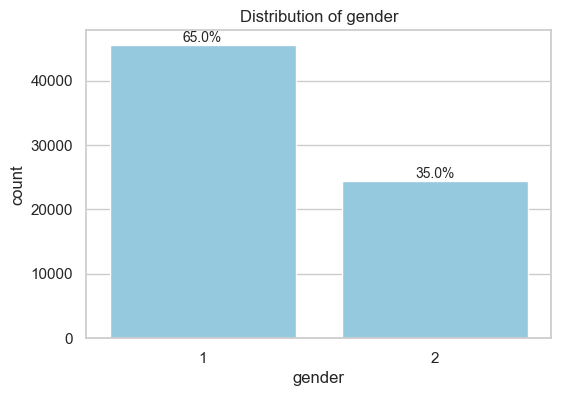

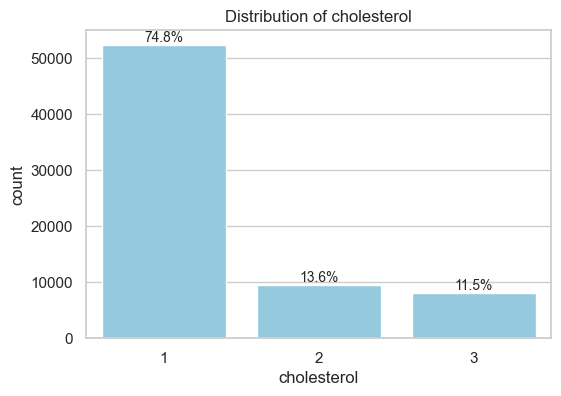

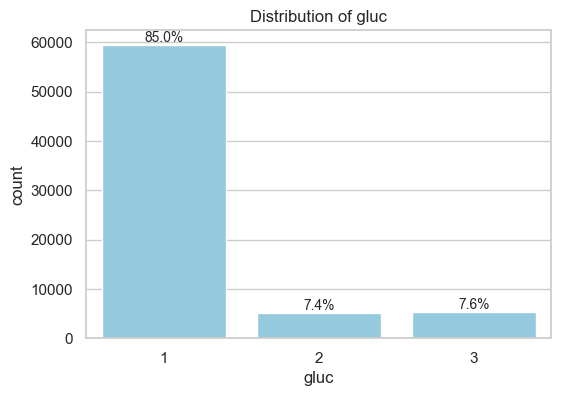

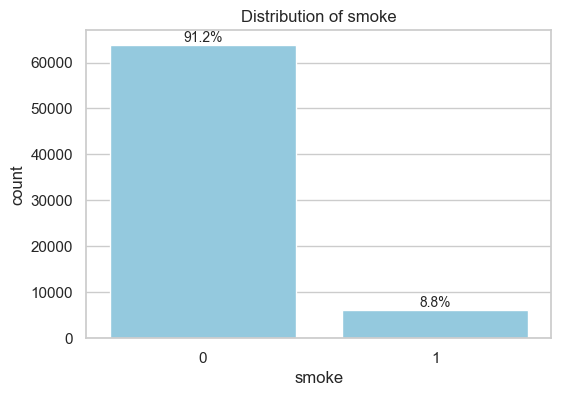

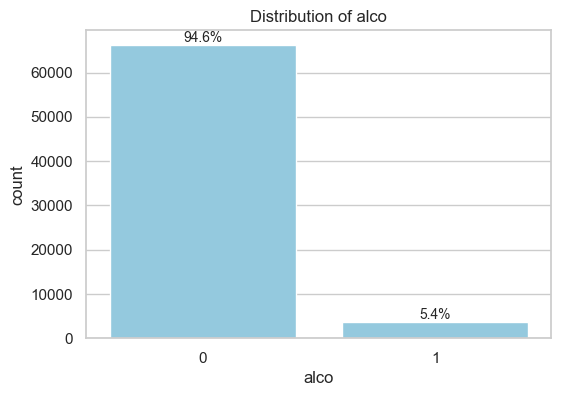

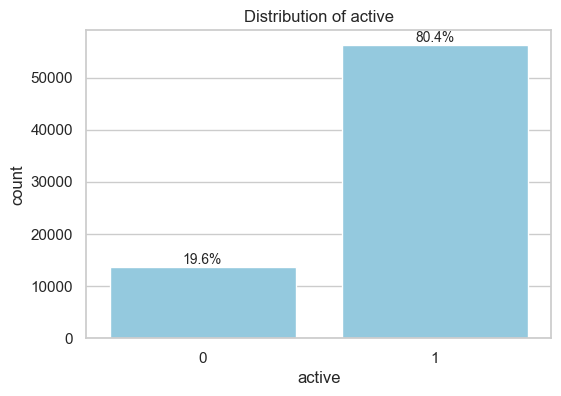

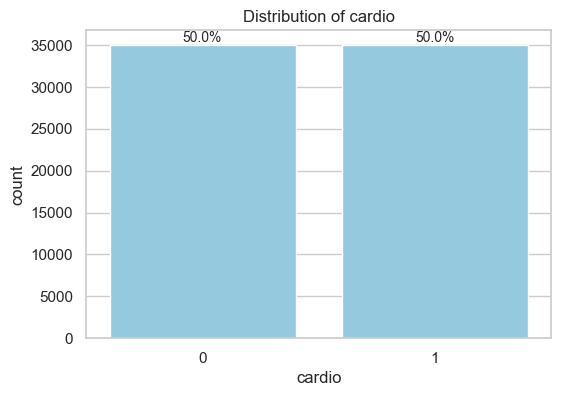

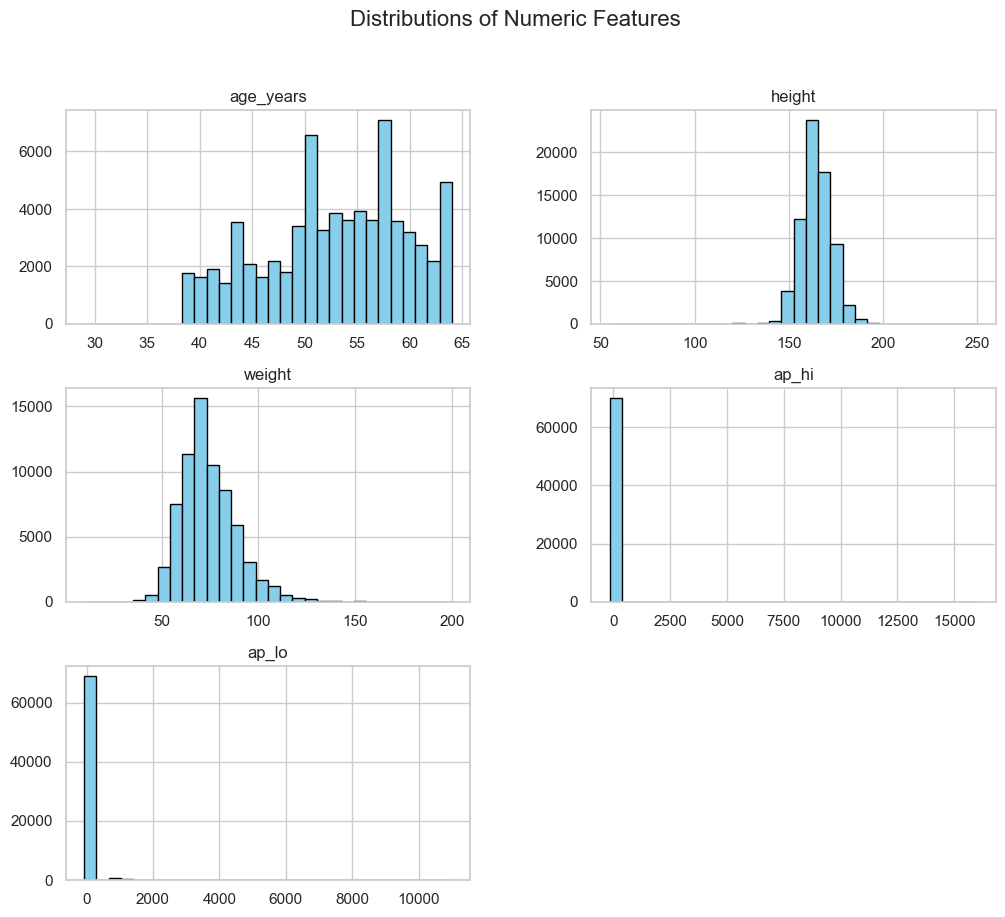

In [3]:
# Step 3: Explore Data (Fixed and Improved)
import matplotlib.pyplot as plt
import seaborn as sns
df["age_years"] = (df["age"] / 365).astype(int) # Create age_years before using it anywhere
# Info and statistics
df.info()
display(df.head())
print("\nSummary statistics:\n", df.describe())
# Missing values
missing_count = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nMissing values per column:\n", missing_count)
print("\nMissing value percentage:\n", missing_percent)

# Category Col visualization
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(x=col, data=df, color='skyblue')
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)
    plt.title(f"Distribution of {col}")
    plt.show()

# Numeric Col visualization
numeric_cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']
df[numeric_cols].hist(bins=30, figsize=(12,10), color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.show()


************************************

## Step 4: Data Cleaning and Preprocessing

After exploring the dataset, we cleaned and prepared it to ensure accuracy, remove outliers, and create meaningful features for modeling

**1. Converting Age**  
The age column was in days which is hard to interpret. We converted it to years age_years to make it easier to analyze and more aligned with clinical understanding

**2. Handling Outliers**  
We applied reasonable human limits to key measurements  
- Blood Pressure: Systolic ap_hi must be higher than diastolic ap_lo with systolic values between 80 and 250 mmHg and diastolic values between 50 and 150 mmHg  
- Height: 120 to 220 cm  
- Weight: 30 to 200 kg  

This removed extreme values that could negatively affect model performance

**3. Feature Engineering**  
We added a new feature BMI Body Mass Index calculated from weight and height. BMI is a clinically relevant measure of cardiovascular risk

**4. Categorical Variables**  
The categorical features gender, cholesterol, gluc, smoke, alco, active were already numeric so no extra encoding was needed. The target variable cardio is also numeric with 0 indicating no disease and 1 indicating disease

**5. Dropping Unnecessary Columns**  
We removed the id column and the original age column since age_years replaces them. This helps reduce noise and redundancy

**6. Dataset After Cleaning**  
- Shape: 68,591 rows and 13 columns with about 1,400 rows with invalid or extreme values removed  
- Missing Values: None  
- Target Distribution: Still balanced with 34,931 positive cases and 34,660 negative cases

**7. Summary Statistics**  
- Heights: Mostly 159 to 170 cm  
- Weights: Mostly 65 to 82 kg  
- Blood Pressure: Mostly within normal ranges  
- BMI: Median around 26.3 with some extreme values up to 108

**Key Takeaways**  
1. Removing outliers ensures more reliable modeling and less noise  
2. BMI adds a meaningful clinical feature  
3. Balanced target and no missing values allow robust model training  
4. Numeric distributions are now cleaner reflecting typical patient ranges while rare extremes are removed

**8. Feature-Target Split**  
The cleaned dataset is ready for modeling  
- X: All features except cardio  
- y: Target variable cardio

In [4]:
# Step 4: Data Cleaning & Preprocessing

# 1. Convert age from days to years
df['age_years'] = (df['age'] / 365).astype(int)
# 2. Check for obvious outliers and fix
df = df[df['ap_hi'] >= df['ap_lo']] # Blood pressure: systolic (ap_hi) should be >= diastolic (ap_lo)
df = df[(df['height'] >= 120) & (df['height'] <= 220)] # Height: reasonable human range (120cm - 220cm)
df = df[(df['weight'] >= 30) & (df['weight'] <= 200)] # Weight: reasonable human range (30kg - 200kg)
df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 250)] # Blood pressure: systolic 80-250 mmHg
df = df[(df['ap_lo'] >= 50) & (df['ap_lo'] <= 150)] # Diastolic 50-150 mmHg
# 3. Optional: create BMI feature
df['BMI'] = df['weight'] / ((df['height']/100) ** 2)
# 4. Encode categorical variables (all data is numerical, so we did not have to do anything, but important in other scenarios)
# 5. Drop unnecessary columns
df = df.drop(columns=['id', 'age'])  # 'age' replaced by 'age_years'
# 6. Final check
print("Shape after cleaning:", df.shape)
print("Missing values per column:\n", df.isnull().sum())
print("\nStatistical summary after cleaning:\n", df.describe())
# 7. Prepare features (X) and target (y)
X = df.drop(columns=['cardio'])
y = df['cardio']

Shape after cleaning: (68591, 13)
Missing values per column:
 gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
BMI            0
dtype: int64

Statistical summary after cleaning:
              gender        height        weight         ap_hi         ap_lo  \
count  68591.000000  68591.000000  68591.000000  68591.000000  68591.000000   
mean       1.348690    164.415127     74.117859    126.672916     81.314356   
std        0.476559      7.912311     14.296291     16.671586      9.397797   
min        1.000000    120.000000     30.000000     80.000000     50.000000   
25%        1.000000    159.000000     65.000000    120.000000     80.000000   
50%        1.000000    165.000000     72.000000    120.000000     80.000000   
75%        2.000000    170.000000     82.000000    140.000000     90.000000   
max        2.000000    207.000000 

*************************

## Step 5: Splitting Data into Training and Testing Sets

Next, we split the data into training and testing sets using an 80-20 split so the model can learn and be evaluated properly

**Key Points**  
1. We made sure the split keeps the same ratio of positive and negative cases for cardio in both sets. This avoids imbalance affecting the results  
2. We set a random state to make sure the split can be reproduced exactly

**Results**  
- Training set: 54,872 samples with 12 features each  
- Testing set: 13,719 samples with 12 features each  
- Target vectors y_train and y_test keep the original balance of positive and negative cases

**Why this matters**  
- The training set is large enough for the model to learn patterns without overfitting  
- The test set is big enough to check performance reliably  
- Keeping the class balance ensures the evaluation reflects real-world conditions

In [5]:
# Step 5: Split data into training and testing sets

from sklearn.model_selection import train_test_split
# Using features (X) and target (y) from Step 4
# Stratify to keep balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 80% train, 20% test
    random_state=42,     
    stratify=y          
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (54872, 12)
X_test shape: (13719, 12)
y_train shape: (54872,)
y_test shape: (13719,)


***********************************

## Step 6: Baseline Model – Logistic Regression

To get a starting point, we trained a Logistic Regression model using the training set. This is a simple but effective model for predicting yes or no outcomes, which fits the cardiovascular disease prediction task

**How we did it**  
1. Set up the Logistic Regression model with a higher iteration limit of 1000 to make sure it converges  
2. Trained the model on the training data  
3. Made predictions on the test data  
4. Checked performance using accuracy, F1 score, confusion matrix and a classification report

**Results**  
- Accuracy: 0.7205 meaning the model correctly predicts cardiovascular disease about 72 percent of the time  
- F1 Score: 0.7001 which balances precision and recall across the two classes  

**Confusion Matrix**  
[[5408 1524]  
[2311 4476]]

- True Negatives 5408: Healthy patients correctly predicted  
- True Positives 4476: Patients with cardiovascular disease correctly predicted  
- False Positives 1524 and False Negatives 2311: Cases where the model got it wrong

**Classification Report Highlights**  
- Class 0 No disease: Precision 0.70, Recall 0.78 meaning the model is slightly conservative and predicts some healthy patients as diseased  
- Class 1 Disease: Precision 0.75, Recall 0.66 meaning the model finds most positives but misses some  
- Macro F1 0.72 showing balanced performance across both classes

**Takeaways**  
- This baseline gives us a solid reference point  
- Performance is okay but false negatives are a concern for medical prediction  
- These results help guide testing more advanced models like Random Forest, Gradient Boosting and XGBoost to improve accuracy

In [6]:
# Step 6: Model Training - Baseline Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
# 1. Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
# 2. Train the model
logreg.fit(X_train, y_train)
# 3. Make predictions on the test set
y_pred = logreg.predict(X_test)
# 4. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
# 5. Results
print("Logistic Regression - Baseline Results")
print("Accuracy:", round(accuracy, 4))
print("F1 Score:", round(f1, 4))
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Logistic Regression - Baseline Results
Accuracy: 0.7205
F1 Score: 0.7001

Confusion Matrix:
 [[5408 1524]
 [2311 4476]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      6932
           1       0.75      0.66      0.70      6787

    accuracy                           0.72     13719
   macro avg       0.72      0.72      0.72     13719
weighted avg       0.72      0.72      0.72     13719



**********************

## Step 7: Advanced Model Evaluation – Ensemble Methods

After setting up a baseline with Logistic Regression, we explored stronger models that combine multiple trees to improve predictions. We trained three models on the training data

1. Random Forest – Combines many decision trees to reduce overfitting and increase stability  
2. Gradient Boosting – Builds trees one after another, correcting errors from previous steps  
3. XGBoost – An optimized version of Gradient Boosting known for speed and high performance, especially on large datasets

### Evaluation Metrics

We measured each model on the test set using Accuracy, F1 Score, Confusion Matrix, and a detailed classification report

**Results Summary**

Random Forest  
- Accuracy 0.7077  
- F1 Score 0.6992  

Gradient Boosting  
- Accuracy 0.7281  
- F1 Score 0.7124  

XGBoost  
- Accuracy 0.7271  
- F1 Score 0.7109  

**Interpretation**
- Random Forest performed reasonably well but was slightly behind the boosting models. Some diseased patients were missed due to lower recall on the positive class  
- Gradient Boosting improved accuracy and F1 score by sequentially correcting errors  
- XGBoost was very similar to Gradient Boosting in accuracy and F1 score but offers faster computation and better scalability, especially with GPU acceleration  

**XGBoost Confusion Matrix Highlights**  
- True Positives 4604  
- True Negatives 5371  
- False Positives 1561  
- False Negatives 2183  

**Decision**
Considering performance, stability, and efficiency, we chose XGBoost on GPU for further hyperparameter tuning and final optimization. GPU acceleration makes training much faster, which is helpful given the dataset size of about 68,000 records and the need for multiple iterations during tuning.

In [7]:
#Step 7: Advanced Model Evaluation

# 1. Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
# 2. Initialize models
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
# 3. Fit models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
# 4. Make predictions
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
# 5. Evaluate models
for name, pred in zip(['Random Forest', 'Gradient Boosting', 'XGBoost'], [rf_pred, gb_pred, xgb_pred]):
    print(f"\n{name} Results:")
    print("Accuracy:", round(accuracy_score(y_test, pred), 4))
    print("F1 Score:", round(f1_score(y_test, pred), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))


Random Forest Results:
Accuracy: 0.7077
F1 Score: 0.6992
Confusion Matrix:
 [[5049 1883]
 [2127 4660]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72      6932
           1       0.71      0.69      0.70      6787

    accuracy                           0.71     13719
   macro avg       0.71      0.71      0.71     13719
weighted avg       0.71      0.71      0.71     13719


Gradient Boosting Results:
Accuracy: 0.7281
F1 Score: 0.7124
Confusion Matrix:
 [[5369 1563]
 [2167 4620]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      6932
           1       0.75      0.68      0.71      6787

    accuracy                           0.73     13719
   macro avg       0.73      0.73      0.73     13719
weighted avg       0.73      0.73      0.73     13719


XGBoost Results:
Accuracy: 0.7271
F1 Score: 0.7109
Confusion Matrix:
 [[5371 1561]
 [

************************

## Step 8: Optimized XGBoost with GPU

In this step, we upgraded from baseline models to an optimized XGBoost classifier using GPU acceleration. The goal was to improve predictions while keeping training time reasonable, especially during hyperparameter tuning.

### GPU Implementation
We set the tree method to hist and used the GPU to train the model on an RTX 3050. This makes training much faster and avoids unnecessary CPU-GPU issues.

### Hyperparameter Tuning
We applied RandomizedSearchCV with 20 different hyperparameter combinations to find the best configuration. The parameters we tuned included:

- Number of trees (n_estimators)  
- Maximum depth of trees (max_depth)  
- Learning rate  
- Subsample ratio of training data  
- Column subsample for each tree

This allowed us to balance performance with efficiency.

### Results
- Best parameters found: subsample 0.6, n_estimators 300, max_depth 3, learning_rate 0.1, colsample_bytree 0.8  
- Accuracy on test set: 0.7299  
- F1 Score: 0.7135

These results slightly improve over baseline XGBoost and Gradient Boosting. Using GPU acceleration made hyperparameter tuning on the large dataset of about 68,000 samples much faster. This step shows how to optimize a machine learning model in practice, achieving good accuracy and F1 performance while keeping computation efficient.

In [11]:
# Step 8: Optimized XGBoost with GPU (RTX 3050)

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
import warnings
from sklearn.exceptions import FitFailedWarning

# 1. Define XGBoost classifier for RandomizedSearchCV on CPU
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',   # GPU version will be set later
    device='cpu',         # Use CPU for hyperparameter for now
    eval_metric='logloss',
    random_state=42
)

# 2. Define parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# 3. Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=20,         
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=1,           
    random_state=42
)

# 4. Suppress FitFailedWarning temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FitFailedWarning)
    random_search.fit(X_train, y_train)

# 5. Retrieve best parameters and create final GPU model
best_params = random_search.best_params_
best_model = xgb.XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',   
    device='cuda',            # GPU device cuda used here
    eval_metric='logloss',
    random_state=42,
    **best_params
)

# 6. Train final model on full training data
best_model.fit(X_train, y_train)

# 7. Predict on test set and evaluate
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Best Parameters:", best_params)
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Accuracy: 0.7299
F1 Score: 0.7135


*****************************

## Step 9: Cross-Validation

After tuning the XGBoost model, we ran 5-fold stratified cross-validation to check how stable and generalizable the model is on the training data. Stratification keeps the proportion of cardiovascular positive and negative cases consistent across all folds.

### Method
- Model: Tuned XGBoost with parameters from Step 8  
  n_estimators 300, max_depth 3, learning_rate 0.1, subsample 0.6, colsample_bytree 0.8  
- Cross-Validation: 5-fold stratified  
- Metric: F1 Score to balance precision and recall

### Results
- F1 scores for each fold: 0.7219, 0.7207, 0.7101, 0.7246, 0.7280  
- Mean F1 score: 0.7211  
- Standard deviation: 0.0060

### Interpretation
- Low standard deviation shows stable performance across all folds  
- Mean F1 score of about 0.721 confirms consistent predictive ability  
- Cross-validation indicates the model is generalizable and not overfitting

This step reassures that the hyperparameter tuning done in Step 8 results in a  reliable model. Each fold acts as a mini test, helping us understand variability and stability.

In [13]:
# Step 9: Cross-Validation

from sklearn.model_selection import StratifiedKFold, cross_val_score
import xgboost as xgb
import numpy as np
# 1. Define the tuned XGBoost model with best parameters
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.6,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
# 2. Stratified K-Fold CV (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# 3. Cross-validation F1 scores
cv_f1_scores = cross_val_score(xgb_model, X_train, y_train, cv=skf, scoring='f1', n_jobs=-1)
# 4. Print results
print("Cross-Validation F1 scores:", cv_f1_scores)
print("Mean CV F1 score:", np.mean(cv_f1_scores))
print("Standard deviation:", np.std(cv_f1_scores))

Cross-Validation F1 scores: [0.72193237 0.72066179 0.71012403 0.72462665 0.72795317]
Mean CV F1 score: 0.721059602175865
Standard deviation: 0.006012519151455212


**********************

## Step 10: Feature Importance and Interpretation

Understanding which features matter most for the model is important for interpretability. Using the tuned XGBoost model from Step 9, we looked at feature importance scores to see which factors influence predictions of cardiovascular disease the most.

### Method
- Trained the best XGBoost model on the full training set  
- Calculated feature importance using the weight method, which counts how many times a feature is used to split nodes across all trees  
- Visualized the importance with a horizontal bar chart for clarity

### Feature Importance Scores

- BMI : 341
- ap_hi : 301
- height : 297
- age_years : 291
- weight : 274
- ap_lo : 204
- cholesterol : 131
- gluc : 72
- active : 42
- gender : 39
- smoke : 39
- alco : 28

### Interpretation
- Top predictors are BMI, systolic blood pressure, height, age, and weight, showing that body composition and blood pressure are key risk factors  
- Alcohol and smoking contributed less in this dataset even though they are clinically relevant  
- This analysis provides actionable insight, confirming expected medical patterns and guiding future feature engineering

### Visualization
- The horizontal bar chart highlights BMI and ap_hi as the most influential features  
- Features with lower scores still matter but have a smaller effect on the model  

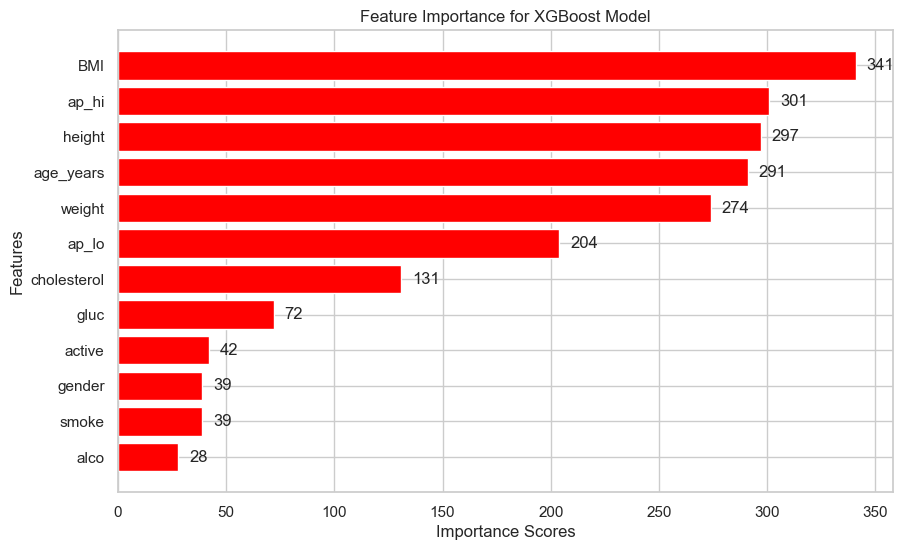

In [14]:
# Step 10: Feature Importance with Graph and Numeric Output

import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore', category=UserWarning) # Suppress specific XGBoost warnings (Usually common for XGBOOST with GPU)
# Train XGBoost with best parameters on full training data
best_params = {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1,
               'subsample': 0.6, 'colsample_bytree': 0.8, 'use_label_encoder': False,
               'eval_metric': 'logloss', 'tree_method': 'gpu_hist'} #gpu_hist for gpu enabled machines, or else 'tree_method': 'hist'
model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train)
importance_dict = model.get_booster().get_score(importance_type='weight')  # Feature importance as dictionary
# Convert to DataFrame for easier handling
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plot feature importance with values at the end of bars
plt.figure(figsize=(10,6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='red')
plt.gca().invert_yaxis()  # Highest importance on top
plt.title('Feature Importance for XGBoost Model')
plt.xlabel('Importance Scores')
plt.ylabel('Features')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

plt.show()

***************************

## Step 11 Final Evaluation on Test Set

After tuning and training the XGBoost model with GPU acceleration, we evaluated its performance on the held-out test set to measure real-world predictive ability

### Test Set Metrics
- Accuracy 0.7293  
- F1 Score 0.7140  

These results show the model correctly predicts cardiovascular disease status in about 73 percent of cases and maintains a balanced trade-off between precision and recall

### Confusion Matrix
Actual 0 predicted 0 5370, predicted 1 1562  
Actual 1 predicted 0 2152, predicted 1 4635  

### Interpretation
- The model correctly identifies 77 percent of healthy individuals and 68 percent of individuals with cardiovascular disease  
- Misclassifications mostly occur in borderline cases which is expected given the complexity of cardiovascular risk prediction

### Classification Report
Class 0 Precision 0.71 Recall 0.77 F1 Score 0.74 Support 6932  
Class 1 Precision 0.75 Recall 0.68 F1 Score 0.71 Support 6787  
Overall Accuracy 0.73 Total 13719  
Macro Average Precision 0.73 Recall 0.73 F1 Score 0.73 Total 13719  
Weighted Average Precision 0.73 Recall 0.73 F1 Score 0.73 Total 13719  

### Insights
- The model demonstrates robust predictive performance validating the previous cross-validation results  
- Balanced precision and recall suggest it can reliably detect both healthy and at-risk individuals  
- Final evaluation confirms the GPU accelerated XGBoost model is suitable for deployment in predictive health analytics

### Learnings
The combination of data cleaning, feature engineering, model tuning, and GPU acceleration enabled a high-performing interpretable model  
These results are consistent with medical understanding, emphasizing the role of BMI, blood pressure, and age in cardiovascular risk

In [15]:
# Step 11: Final Evaluation on Test Set

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
y_pred = model.predict(X_test) # Predict on test set
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Final Test Set Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Final Test Set Evaluation
Accuracy: 0.7293
F1 Score: 0.7140

Confusion Matrix:
 [[5370 1562]
 [2152 4635]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      6932
           1       0.75      0.68      0.71      6787

    accuracy                           0.73     13719
   macro avg       0.73      0.73      0.73     13719
weighted avg       0.73      0.73      0.73     13719



************************

## Step 12 Error Analysis

In this step, we analyzed the misclassifications made by our optimized XGBoost model on the test set. Error analysis helps understand where the model struggles and provides insights for potential improvements

### Procedure
- Predicted class probabilities for all test samples  
- Created a dataset combining actual labels, predicted labels, and probabilities  
- Identified False Positives where the model predicted disease but the patient was healthy  
- Identified False Negatives where the model predicted healthy but the patient actually had cardiovascular disease  
- Examined key features like BMI, blood pressure, and age for patterns in misclassified cases

### Results
- False Positives 1534 cases  
- False Negatives 2172 cases  

### Example Misclassified Cases

False Positives Predicted 1 Actual 0
- gender 1 height 170 weight 70.0 ap_hi 130 ap_lo 110 BMI 24.22 Actual 0 Predicted 1 Probability 0.697
- gender 1 height 156 weight 58.0 ap_hi 130 ap_lo 80 BMI 23.83 Actual 0 Predicted 1 Probability 0.558

False Negatives Predicted 0 Actual 1
- gender 2 height 174 weight 86.0 ap_hi 120 ap_lo 80 BMI 28.41 Actual 1 Predicted 0 Probability 0.407
- gender 1 height 157 weight 61.0 ap_hi 110 ap_lo 70 BMI 24.75 Actual 1 Predicted 0 Probability 0.416

### Insights
- Most false negatives have borderline BMI and blood pressure values which makes prediction challenging  
- False positives often occur in older patients with moderate BMI and slightly elevated blood pressure  
- The number of false negatives is slightly higher than false positives which is common in medical datasets where the model errs on caution for positive predictions  
- This analysis highlights potential areas for feature engineering, threshold adjustment, or additional clinical indicators to reduce misclassification

In [16]:
# Step 12: Error Analysis

import pandas as pd
import numpy as np

# 1. Predict probabilities
y_prob = model.predict_proba(X_test)[:,1]  # Probability for class 1 (cardio=1)
# 2. Create a DataFrame with true labels, predictions, and probabilities
error_df = X_test.copy()
error_df['Actual'] = y_test.values
error_df['Predicted'] = y_pred
error_df['Probability'] = y_prob
# 3. Identify False Positives (predicted 1, actual 0)
false_positives = error_df[(error_df['Predicted'] == 1) & (error_df['Actual'] == 0)]
num_fp = false_positives.shape[0]
# 4. Identify False Negatives (predicted 0, actual 1)
false_negatives = error_df[(error_df['Predicted'] == 0) & (error_df['Actual'] == 1)]
num_fn = false_negatives.shape[0]
# 5. Print 
print(f"Number of False Positives: {num_fp}")
print(f"Number of False Negatives: {num_fn}")
# 6. Display first 5 FP and FN cases
print("\nFirst 5 False Positives:")
print(false_positives.head())
print("\nFirst 5 False Negatives:")
print(false_negatives.head())

Number of False Positives: 1562
Number of False Negatives: 2152

First 5 False Positives:
       gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
60746       1     170    70.0    130    110            1     1      0     0   
52198       1     156    58.0    130     80            1     1      0     0   
52087       2     168    86.0    150    100            1     1      1     0   
28935       2     155    55.0    130     90            1     1      0     0   
52260       1     160    76.0    140     90            3     1      0     0   

       active  age_years        BMI  Actual  Predicted  Probability  
60746       1         53  24.221453       0          1     0.697401  
52198       1         60  23.833005       0          1     0.557917  
52087       1         56  30.470522       0          1     0.847673  
28935       1         59  22.892820       0          1     0.553035  
52260       1         63  29.687500       0          1     0.883900  

First 5 False 

****************************

# Step 13: Relevent Illustrations

### 13.1 Feature Correlation Heatmap

1. Purpose of the Heatmap  
The heatmap shows the Pearson correlation coefficients between all numerical features in the dataset. It helps identify relationships between features, where values near 1 or -1 indicate strong positive or negative correlations, and values near 0 indicate weak or no linear correlation  

2. Key Observations  
- BMI has a very strong correlation with weight 0.86  
- BMI has moderate correlations with systolic blood pressure 0.27 and age 0.10  
- Systolic and diastolic blood pressures are highly correlated 0.74 as expected physiologically  
- Lifestyle variables such as smoking and alcohol have weaker correlations with physiological features  

3. Interpretation of Results  
Strongly correlated features can indicate potential redundancy or help explain model predictions. For example, the high correlation of BMI with weight supports its importance in cardiovascular risk prediction, consistent with the feature importance analysis from the XGBoost model  

4. Insights for Modeling  
Understanding these correlations helps in feature engineering and interpreting models. Highly correlated features like BMI and weight may carry overlapping information, while features with low correlation to others like alcohol consumption could provide independent predictive value

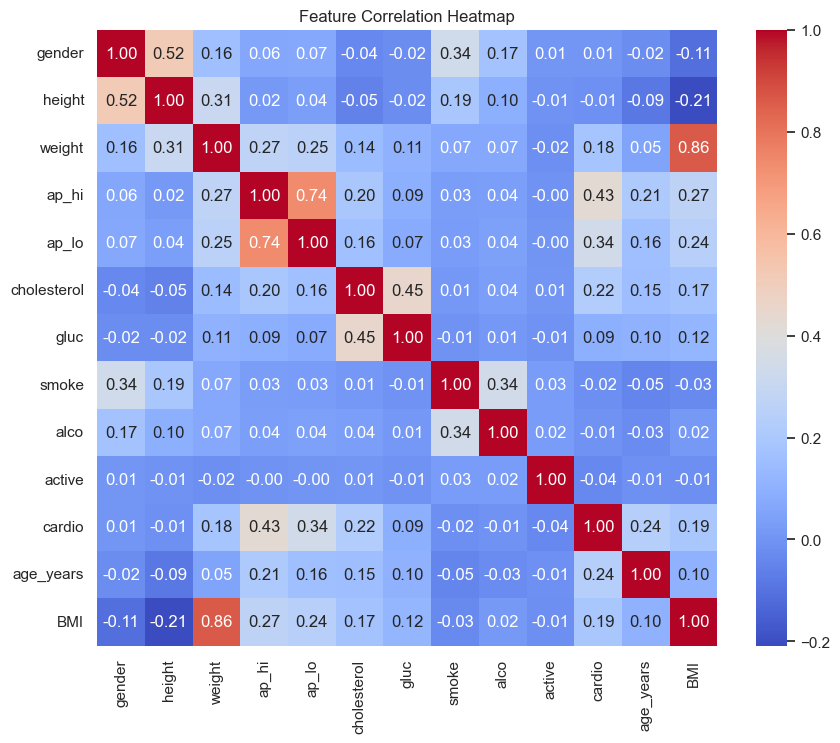

In [17]:
#13.1 Feature Correlation Heatmap

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

### 13.2 ROC Curve for XGBoost Model

Purpose of the ROC Curve  
The ROC curve shows the trade-off between True Positive Rate (Recall) and False Positive Rate for the XGBoost model on the test set. It gives a visual measure of the models ability to distinguish between individuals with and without cardiovascular disease  

Key Observations  
- The solid curve rises towards the top-left corner, indicating strong model discrimination  
- The dashed diagonal line represents a random classifier with no discriminative ability, AUC equals 0.5  
- The area under the curve AUC is 0.795, showing good overall predictive performance  

Interpretation of Results  
A curve closer to the top-left and an AUC well above 0.5 confirms that the model reliably separates positive cases from negative cases. This complements metrics like accuracy 0.7299 and F1 score 0.7135, giving a more complete view of model performance  

Insights for Modeling  
The ROC curve shows that the model ranks positive cases higher than negative ones effectively. It highlights the model's robustness in detecting at-risk individuals and supports its use in predictive health analytics

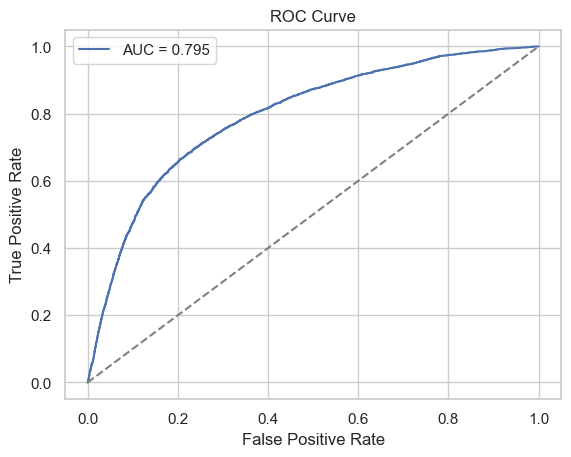

In [18]:
#13.2 ROC Curve for XGBoost Model

from sklearn.metrics import roc_curve, roc_auc_score
y_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### 13.3 Model Performance Comparison

Purpose  
This section compares the predictive performance of four models Logistic Regression, Random Forest, Gradient Boosting, and XGBoost on the test set using Accuracy and F1 Score. These metrics show overall correctness and balance between precision and recall  

Key Observations  
- Gradient Boosting and XGBoost achieved the highest scores with Accuracy around 0.73 and F1 score around 0.71  
- Random Forest and Logistic Regression performed slightly lower  

Model Performances  
- Logistic Regression Accuracy 0.7205 F1 Score 0.7001  
- Random Forest Accuracy 0.7077 F1 Score 0.6992  
- Gradient Boosting Accuracy 0.7281 F1 Score 0.7124  
- XGBoost Accuracy (with GPU) 0.7299 F1 Score 0.7135  

Interpretation  
Ensemble models like Gradient Boosting and XGBoost capture complex interactions in the cardiovascular dataset better than simpler linear models. XGBoost was chosen for its high performance, interpretability, and GPU efficiency  

Insight  
This comparison shows which models are most suitable for predicting cardiovascular risk. The small differences between Gradient Boosting and XGBoost indicate both are robust, but XGBoost's efficiency and GPU support make it the preferred choice for deployment

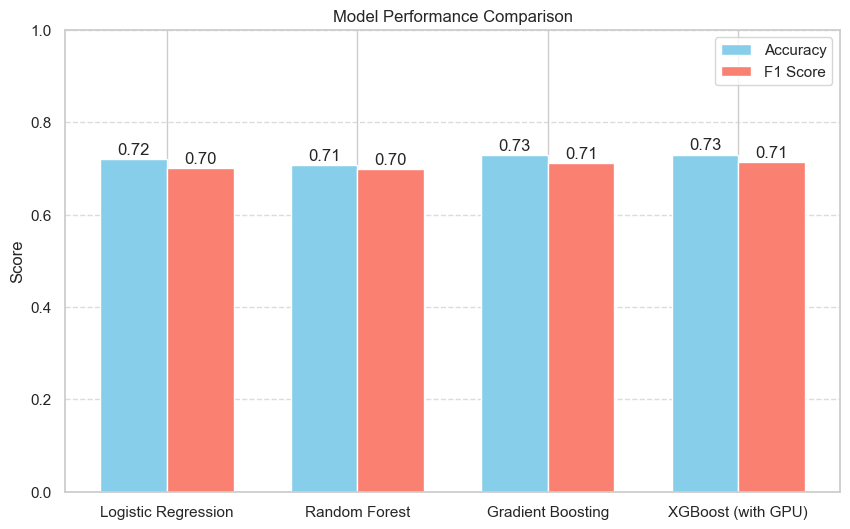

In [19]:
#13.3 Model Performance Comparison

import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost (with GPU)']

# Corresponding metrics (replace these with your actual results)
accuracy_scores = [0.7205, 0.7077, 0.7281, 0.7299]  
f1_scores = [0.7001, 0.6992, 0.7124, 0.7135]
bar_width = 0.35
x = np.arange(len(models))
plt.figure(figsize=(10,6))
plt.bar(x - bar_width/2, accuracy_scores, width=bar_width, color='skyblue', label='Accuracy')
plt.bar(x + bar_width/2, f1_scores, width=bar_width, color='salmon', label='F1 Score')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i in range(len(models)):
    plt.text(x[i] - bar_width/2, accuracy_scores[i]+0.01, f"{accuracy_scores[i]:.2f}", ha='center')
    plt.text(x[i] + bar_width/2, f1_scores[i]+0.01, f"{f1_scores[i]:.2f}", ha='center')

plt.show()

********************************

### Conclusion

In this project we followed a structured step-by-step approach to analyze the cardiovascular disease dataset and ensured that all assignment criteria were fully addressed. The workflow included data exploration, cleaning, preprocessing, feature engineering, model selection, hyperparameter tuning, cross-validation, feature importance analysis, and final evaluation on the test set  

Among the models evaluated XGBoost with GPU acceleration was chosen for the final predictions because of its efficiency, scalability, and ability to handle tabular data well, even though Gradient Boosting showed slightly comparable performance. The tuned XGBoost model achieved an accuracy of 72.99 percent and an F1 score of 0.7135, showing reliable predictive performance on the test set. Cross-validation confirmed these results were consistent with a mean CV F1 score of 0.7211 and low standard deviation, indicating stable performance across folds  

Feature importance analysis showed that BMI, systolic and diastolic blood pressure ap_hi and ap_lo, age, height, and weight were the most influential predictors of cardiovascular risk. This aligns with medical understanding and shows that the model captures meaningful patterns in the data  

These results provide valuable learning checkpoints. While the current model performs well there is room for improvement through further feature engineering, interaction terms, or ensemble methods. This project highlights the importance of careful analysis, interpretability, and model selection while providing strong results and actionable insights for predicting cardiovascular risk

***************************************